In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedmaideen/zillow-com-house-price-prediction")

print("Path to dataset files:", path)

100%|██████████| 15.5M/15.5M [00:00<00:00, 49.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mohamedmaideen/zillow-com-house-price-prediction/versions/1


In [2]:
file_path = '/root/.cache/kagglehub/datasets/mohamedmaideen/zillow-com-house-price-prediction/versions/1/Zillow.com House Price Prediction Data.xlsx'

# defolt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(
    '/root/.cache/kagglehub/datasets/mohamedmaideen/zillow-com-house-price-prediction/versions/1/Zillow.com House Price Prediction Data.xlsx',
    engine='openpyxl'
)

In [5]:
df.drop(columns=['monthlyHoaFee', 'dateSold', 'brokerageName', 'providerListingID', 'brokerId',
             'comingSoonOnMarketDate', 'comingSoonOnMarketDate', 'comingSoonOnMarketDate',
             'building', 'homeFacts', 'datePosted', 'isListedByOwner', 'mlsid', 'buildingId',
             'solarPotential', 'contingentListingType', 'message', 'resoFacts.daysOnZillow'], inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df['timeOnZillow'] = df['timeOnZillow'].apply(lambda x: int(x.split(' ')[0]))
df['streetAddress'] = df['streetAddress'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
target = 'price'

In [8]:
df.loc[0]

,0
contact_recipients,"[{'agent_reason': 1, 'zpro': None, 'recent_sal..."
longitude,-149.90807
countyFIPS,2020.0
imgSrc,https://photos.zillowstatic.com/fp/ce047439c86...
livingAreaValue,2668.0
streetAddress,500
county,Anchorage Borough
timeZone,America/Anchorage
taxHistory,"[{'time': 1691996796990, 'valueIncreaseRate': ..."
annualHomeownersInsurance,2840


In [22]:
train = df.copy()
test = train.drop(columns=target)

In [11]:
df.head(3)

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,timeZone,taxHistory,annualHomeownersInsurance,...,bedrooms,propertyTypeDimension,mortgageZHLRates,price,favoriteCount,zestimateHighPercent,listingSubType,pageViewCount,country,homeType
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90807,2020.0,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500,Anchorage Borough,America/Anchorage,"[{'time': 1691996796990, 'valueIncreaseRate': ...",2840,...,3.0,Single Family,"{'thirtyYearFixedBucket': {'rate': None, 'rate...",676100,0.0,13.0,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",12925.0,USA,SINGLE_FAMILY
2,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90833,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522,Anchorage Borough,America/Anchorage,"[{'time': 1691999146138, 'valueIncreaseRate': ...",4187,...,4.0,Single Family,"{'thirtyYearFixedBucket': {'rate': None, 'rate...",996800,0.0,14.0,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",21.0,USA,SINGLE_FAMILY
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90834,2020.0,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530,Anchorage Borough,America/Anchorage,"[{'time': 1692004364225, 'valueIncreaseRate': ...",2920,...,5.0,Single Family,"{'thirtyYearFixedBucket': {'rate': None, 'rate...",695300,0.0,16.0,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,USA,SINGLE_FAMILY


# other

In [ ]:
file_path = ''

In [ ]:
df = pd.read_csv(file_path, engine="pyarrow")

In [ ]:
df = pd.read_parquet(file_path, engine="fastparquet")

In [ ]:
df.to_pickle(file_path, compression='gzip')
df = pd.read_pickle(file_path, compression='gzip')

In [ ]:
df = pd.read_excel(file_path
        engine='openpyxl'
)

# Preprocesses

In [12]:
numerical_columns = train.drop(columns=target).describe().columns
cols = numerical_columns
categorical_columns = set(train.drop(columns=target).columns) - set(numerical_columns)

## EDA

In [22]:
list(cols) + [target]

['longitude',
 'countyFIPS',
 'livingAreaValue',
 'streetAddress',
 'annualHomeownersInsurance',
 'yearBuilt',
 'latitude',
 'rentZestimate',
 'zestimateLowPercent',
 'cityId',
 'timeOnZillow',
 'zestimate',
 'zpid',
 'countyId',
 'livingArea',
 'stateId',
 'propertyTaxRate',
 'bathrooms',
 'bedrooms',
 'favoriteCount',
 'zestimateHighPercent',
 'pageViewCount',
 'price']

In [27]:
!pip install sweetviz
import sweetviz as sv
report = sv.analyze([df, " Permit Logs"])
report.show_html('common analysis.html')

                                             |          | [  0%]   00:00 -> (? left)

график по nan в прорцентах и абсолют

In [ ]:
variables = df.columns
count = []
for variable in variables:
    length = df[variable].count()
    count.append(length)
count_pct = np.round(100 * pd.Series(count) / len(df), 2)
count = pd.Series(count)
missing = pd.DataFrame()
missing['variables'] = variables
missing['count'] = len(df) - count
missing['count_pct'] = 100 - count_pct
missing = missing[missing['count_pct'] > 0]
missing.sort_values(by=['count_pct'], inplace=True)
missing_train = np.array(missing['variables'])
plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
plt.barh(missing['variables'], missing['count_pct'])
plt.title('Count of missing training data in percent', fontsize=15)
plt.subplot(1,2,2)
plt.barh(missing['variables'], missing['count'])
plt.title('Count of missing training data as total records', fontsize=15)
plt.show()

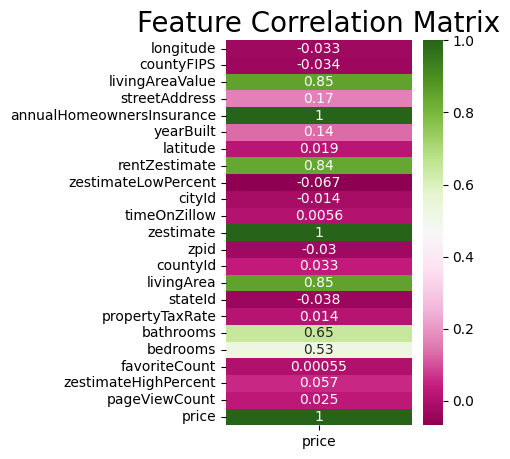

In [23]:
plt.figure(figsize=(3,5))
sns.heatmap(df[list(cols) + [target]].corr()[[target]], annot=True, cmap='PiYG')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

In [ ]:
cat_cols = df.select_dtypes('object').columns

<Axes: >

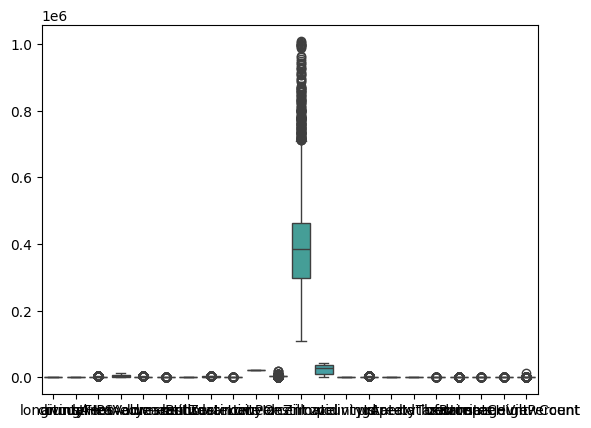

In [21]:
sns.boxplot(df[cols]) # MinMaxScaler

## corr and quantile, other

In [ ]:
from sklearn.impute import SimpleImputer

for col in numerical_columns:
    si = SimpleImputer(strategy='median')
    train[col] = si.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = si.fit_transform(test[col].values.reshape(-1, 1))

for col in categorical_columns:
    si = SimpleImputer(strategy='most_frequent')
    train[col] = si.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = si.fit_transform(test[col].values.reshape(-1, 1))

In [ ]:
def drop_highly_corr_columns(df, target, threshold=0.8):
    corr_matrix = df.drop(columns=target).select_dtypes(['float64', 'int64']).corr().abs()
    cols = corr_matrix.sum().sort_values(ascending=False).index
    columns_to_drop = set()
    for i in cols:
      for j in cols:
        if i==j: continue
        if corr_matrix.loc[i, j] > threshold and not j in columns_to_drop:
            columns_to_drop.add(i)
    return list(columns_to_drop)

In [17]:
def remove_outliers_by_percentiles(df, columns, lower_percentile=0.5, upper_percentile=99.5, max_removal_percentage=0.05):
    original_shape = df.shape
    for column in columns:
        if column in df.columns:
            lower_bound = df[column].quantile(lower_percentile / 100)
            upper_bound = df[column].quantile(upper_percentile / 100)
            mask = (df[column] >= lower_bound) & (df[column] <= upper_bound)
            mask_l = (df[column] >= lower_bound)
            mask_r = (df[column] <= upper_bound)
            rows_to_remove = original_shape[0] - mask.sum()
            rows_to_remove_l = original_shape[0] - mask_l.sum()
            rows_to_remove_r = original_shape[0] - mask_r.sum()
            mx = original_shape[0] * max_removal_percentage
            if rows_to_remove_l > mx and rows_to_remove_r > mx:
                print(f"Предупреждение: В колонне '{column}' удаляется {rows_to_remove} строк ({(rows_to_remove / original_shape[0]) * 100:.2f}%), что превышает допустимый порог.")
                continue
            elif rows_to_remove_l > mx:
                df = df[mask_r]
            elif rows_to_remove_r > mx:
                df = df[mask_l]
            else:
                df = df[mask]
    return df

In [ ]:
columns_to_drop = drop_highly_corr_columns(df, target, threshold=0.95)
columns_to_drop

In [ ]:
cols = ['longitude', 'countyFIPS', 'yearBuilt', 'latitude', 'favoriteCount', 'pageViewCount', 'bedrooms', 'bathrooms']

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'countyFIPS'}>,
        <Axes: title={'center': 'yearBuilt'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'favoriteCount'}>,
        <Axes: title={'center': 'pageViewCount'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>, <Axes: >]], dtype=object)

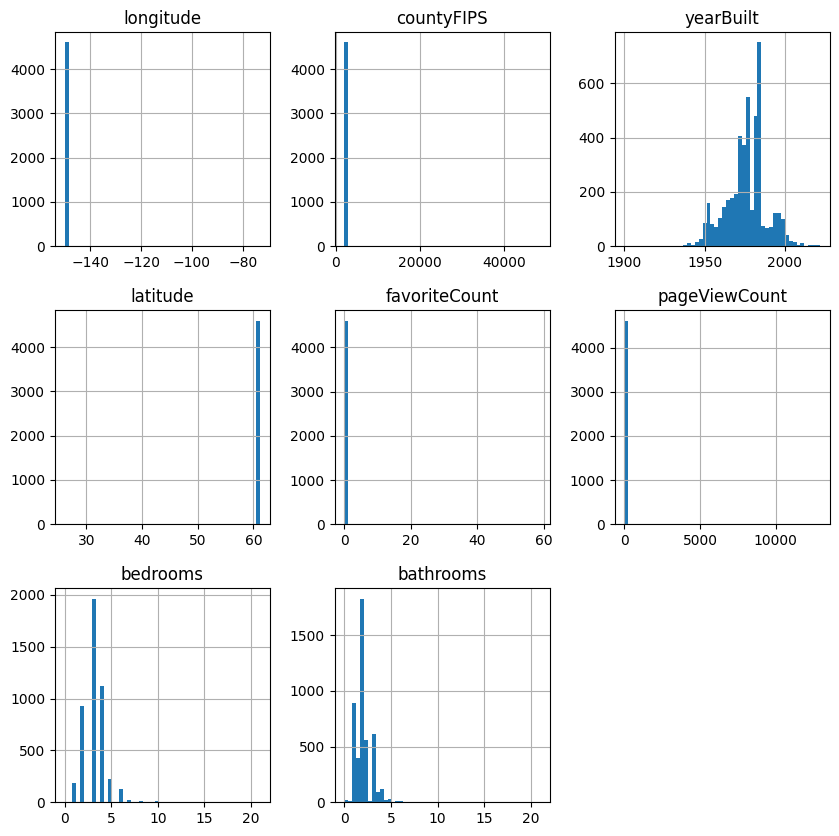

In [ ]:
df[cols].hist(bins=50, figsize=(10, 10))

In [20]:
df = remove_outliers_by_percentiles(df, columns=cols)

Предупреждение: В колонне 'latitude' удаляется 267 строк (5.78%), что превышает допустимый порог.
Предупреждение: В колонне 'rentZestimate' удаляется 267 строк (5.78%), что превышает допустимый порог.
Предупреждение: В колонне 'zestimateLowPercent' удаляется 250 строк (5.41%), что превышает допустимый порог.
Предупреждение: В колонне 'timeOnZillow' удаляется 265 строк (5.73%), что превышает допустимый порог.
Предупреждение: В колонне 'zestimate' удаляется 266 строк (5.76%), что превышает допустимый порог.
Предупреждение: В колонне 'zpid' удаляется 267 строк (5.78%), что превышает допустимый порог.
Предупреждение: В колонне 'livingArea' удаляется 267 строк (5.78%), что превышает допустимый порог.
Предупреждение: В колонне 'bathrooms' удаляется 257 строк (5.56%), что превышает допустимый порог.
Предупреждение: В колонне 'zestimateHighPercent' удаляется 254 строк (5.50%), что превышает допустимый порог.


In [ ]:
cleaned_df.shape, df.shape

((4397, 51), (4397, 51))

In [ ]:
df = cleaned_df

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'countyFIPS'}>,
        <Axes: title={'center': 'yearBuilt'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'favoriteCount'}>,
        <Axes: title={'center': 'pageViewCount'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>, <Axes: >]], dtype=object)

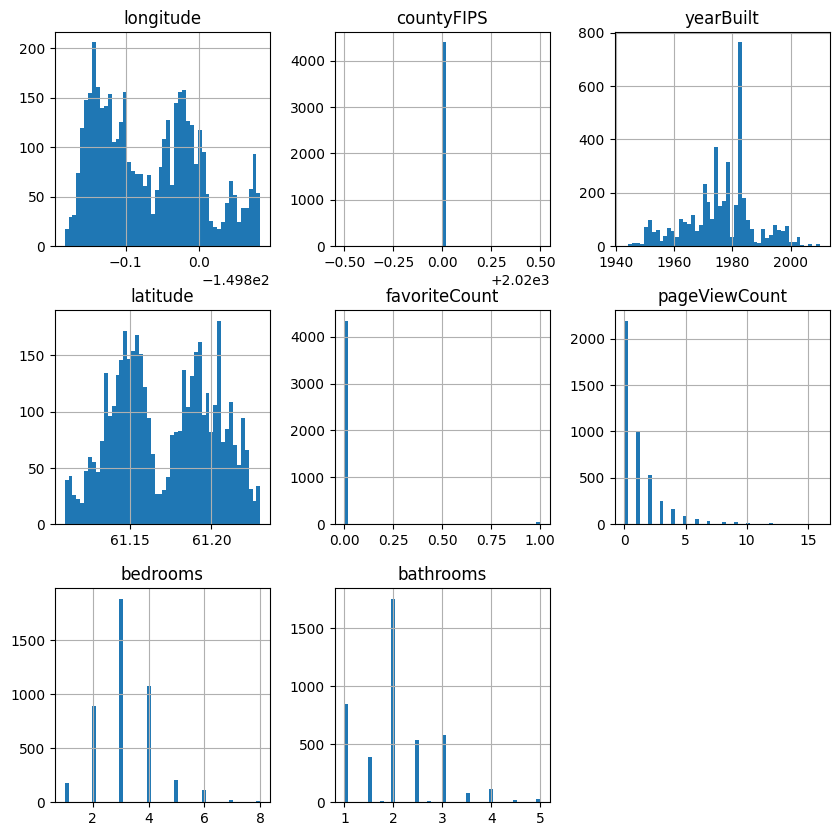

In [ ]:
cleaned_df[cols].hist(bins=50, figsize=(10, 10))

## cat фичи

### func

In [ ]:
df.unique()

In [29]:
df.loc[0]

,0
contact_recipients,"[{'agent_reason': 1, 'zpro': None, 'recent_sal..."
longitude,-149.90807
countyFIPS,2020.0
imgSrc,https://photos.zillowstatic.com/fp/ce047439c86...
livingAreaValue,2668.0
streetAddress,500
county,Anchorage Borough
timeZone,America/Anchorage
taxHistory,"[{'time': 1691996796990, 'valueIncreaseRate': ..."
annualHomeownersInsurance,2840


In [ ]:
df['timestamp'] = pd.to_datetime(df['timeOnZillow'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # Суббота и воскресенье
df['is_holiday'] = df['timestamp'].dt.strftime('%m-%d').isin(['01-01', '07-04', '12-25']).astype(int)  # Пример праздников

# Циклические признаки
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
# Условия для часа пик
df['quarter'] = df['timestamp'].dt.quarter# Бинарные признаки
is_weekday = (df['day_of_week'] < 5)  # Понедельник - Пятница
is_morning_rush = (df['hour'] >= 7) & (df['hour'] < 9)  # Утренние часы пик
is_evening_rush = (df['hour'] >= 17) & (df['hour'] < 19)  # Вечерние часы пик
df['is_rush_hour'] = is_weekday & (is_morning_rush | is_evening_rush)

In [30]:
from sklearn.preprocessing import LabelEncoder, TargetEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

def LabelEncoder_func(train, test, cols):
  for col in cols:
      print(col)
      Label_encoder = LabelEncoder()
      train[col] = Label_encoder.fit_transform(train[col])
      test[col] = Label_encoder.transform(test[col])
  return [train, test]

def TargetEncoder_func(train, test, cols, target_col):
  for col in cols:
      print(col)
      target_encoder = TargetEncoder()
      train[col] = target_encoder.fit_transform(train[col].values.reshape(-1, 1), train[target_col])
      test[col] = target_encoder.transform(test[col].values.reshape(-1, 1))
  return [train, test]

def OneHotEncoder_func(train, test, cols):
  for col in cols:
      print(col)
      onehot_encoder = OneHotEncoder(handle_unknown='ignore')
      onehot_encoder.fit(train[[col]])
      train = pd.concat([train, pd.DataFrame(onehot_encoder.transform(train[[col]]).toarray(),
                                            columns=onehot_encoder.get_feature_names_out())], axis=1)
      test = pd.concat([test, pd.DataFrame(onehot_encoder.transform(test[[col]]).toarray(),
                                            columns=onehot_encoder.get_feature_names_out())], axis=1)
  return [train, test]

def PCA_func(train, test, cols, del_cols=False):
  for col in cols:
      print(col)
      pca = PCA(random_state=52, n_components=1)
      train[''.join(col) + '_pca'] = pca.fit_transform(train[col])
      test[''.join(col) + '_pca'] = pca.transform(test[col])
      if del_cols:
        train.drop(columns=col, inplace=True)
        test.drop(columns=col, inplace=True)
  return [train, test]

def KMeans_func(train, test, cols, del_cols=False, clusters=4):
  for col in cols:
      print(col)
      kmeans = KMeans(random_state=52, n_clusters=clusters)
      kmeans.fit(train[col])
      train[''.join(col) + '_kmeans'] = kmeans.predict(train[col])
      test[''.join(col) + '_kmeans'] = kmeans.predict(test[col])
      if del_cols:
        train.drop(columns=col, inplace=True)
        test.drop(columns=col, inplace=True)
  return [train, test]

In [ ]:
categorical_columns

### блоками

In [ ]:
from sklearn.preprocessing import LabelEncoder
Label_models = {}
for col in ['колонки']:
    print(col)
    Label_encoder = LabelEncoder()
    train[col] = Label_encoder.fit_transform(train[col])
    Label_models[col] = Label_encoder

In [ ]:
from sklearn.preprocessing import TargetEncoder
for col in ['колонки']:
    print(col)
    target_encoder = TargetEncoder()
    train[col] = target_encoder.fit_transform(train[col].values.reshape(-1, 1), train['target'])
    test[col] = target_encoder.transform(test[col].values.reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
for col in ['колонки']:
    print(col)
    onehot_encoder = OneHotEncoder(handle_unknown='ignore')
    onehot_encoder.fit(train[[col]])
    train = pd.concat([train, pd.DataFrame(onehot_encoder.transform(train[[col]]).toarray(),
                                          columns=onehot_encoder.get_feature_names_out())], axis=1)
    test = pd.concat([test, pd.DataFrame(onehot_encoder.transform(test[[col]]).toarray(),
                                              columns=onehot_encoder.get_feature_names_out())], axis=1)

In [ ]:
from sklearn.decomposition import PCA
for col in ['колонки']:
    print(col)
    pca = PCA(n_components=1, random_state=52)
    train[col] = pca.fit_transform(train[col])
    test[col] = pca.transform(test[col])

In [ ]:
from sklearn.cluster import KMeans
for col in ['колонки']:
    print(col)
    kmeans = KMeans(n_clusters=4, random_state=52)
    kmeans.fit(train[col])
    train[col+'claster'] = kmeans.predict(train[col])
    test[col+'claster'] = kmeans.predict(test[col])

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan_models = {}
# for col in ['колонки']:
#     print(col)
#     dbscan = DBSCAN(eps=0.5, min_samples=5)
#     train[col + 'claster'] = dbscan.fit_predict(train[col])

#     dbscan_models[col] = dbscan

## Int Scalers

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
def Scaler_func(train, test, cols, scaler_name):
    scalers = {
        'Standard': StandardScaler(),
        'MinMax': MinMaxScaler(),
        'Robust': RobustScaler(),
        'Quantile': QuantileTransformer(output_distribution='normal')
    }
    # Получаем нужный скалер по имени
    scaler = scalers[scaler_name]
    for col in cols:
        train[col] = scaler.fit_transform(train[[col]])
        test[col] = scaler.transform(test[[col]])

    return [train, test]


In [24]:
train, test = Scaler_func(train, test, numerical_columns, 'Standard')

<Axes: >

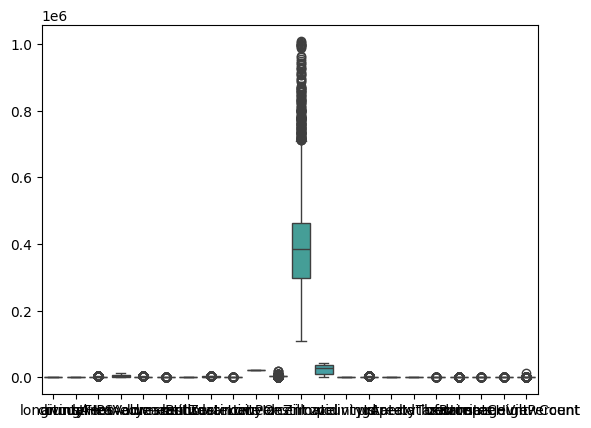

In [25]:
sns.boxplot(df[cols])

<Axes: >

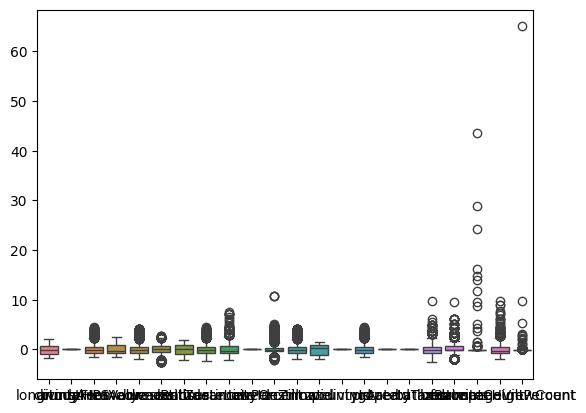

In [26]:
sns.boxplot(train[cols])

# models

## exp

In [119]:
from sklearn.model_selection import train_test_split
X = train.drop(target, axis=1)
y = train[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=52
)

In [ ]:
from xgboost import XGBClassifier, XGBRegressor
model = XGBRegressor(random_state = 52, tree_method='gpu_hist')
model.fit(X_train.drop(columns=X_train.select_dtypes('object').columns), y_train)
pred = model.predict(X_test.drop(columns=X_train.select_dtypes('object').columns))

In [ ]:
from catboost import CatBoostRegressor
cat_fich = [list(X_train.columns).index(i)  for i in X_train.select_dtypes('object').columns]
model = CatBoostRegressor(verbose = 0, random_seed=52, cat_features=cat_fich)
scors = cross_val_score(model, X.values, y.values, cv=5, scoring=make_scorer(mean_absolute_error))
# model.fit(X_train, y_train)
scors

##Class

In [10]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [11]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
import shap

class best_model:
  def __init__(self, data, target, used_model, regression):

    cat_fich = [list(data.drop(columns=target).columns).index(i) \
                for i in data.drop(columns=target).select_dtypes('object').columns]

    if used_model != 'Cat':
      data.drop(columns=data.drop(columns=target).select_dtypes('object').columns, inplace=True)

    self.regression = regression
    self.model = self.get_model(used_model, cat_fich)
    self.data = data
    self.target = target
    self.used_model = used_model

  def train(self, metrics, cross_val=False, test_size=0.3):
    X = self.data.drop(columns=self.target)
    y = self.data[self.target]

    score_func = self.get_score(metrics)

    if cross_val:
      score = cross_val_score(self.model, X.values, y.values, cv=5, scoring=score_func).mean()
    else:
      X_train, X_test, y_train, y_test = train_test_split(
          X.values, y.values, test_size=test_size, random_state=52)
      self.model.fit(X_train, y_train)
      score = score_func(self.model, X_test, y_test)
    return score

  def get_pred(self, data, proba=False):
    if self.used_model != 'Cat':
      data.drop(columns=data.select_dtypes('object').columns, inplace=True)
    if proba:
      return self.model.predict_proba(data)
    return self.model.predict(data)

  def get_shap(self):
    explainer = shap.Explainer(self.model)
    shap_values = explainer(self.data.drop(columns=self.target))
    return shap_values

  def get_model(self, used_model, cat_fich):
    choose_model_class = {
        'Cat': CatBoostClassifier(random_seed=52,verbose = 0, task_type="GPU", cat_features=cat_fich),
        'Xgb': XGBClassifier(random_state = 52, tree_method='gpu_hist'), # or tree_method = "hist", device = "cuda"
        'Lgb' : LGBMClassifier(random_state=52, device = "cpu"), # если получится то device = "gpu"
        'forest': RandomForestClassifier(random_state=52),
        'lin': LogisticRegression()
    }
    choose_model_reg = {
        'Cat': CatBoostRegressor(random_seed=52, verbose = 0, task_type="GPU", cat_features=cat_fich),
        'Xgb': XGBRegressor(random_state = 52, tree_method='gpu_hist'), # or tree_method = "hist", device = "cuda"
        'Lgb': LGBMRegressor(random_state=52, device = "cpu"), # если получится то device = "gpu"
        'forest': RandomForestRegressor(random_state=52),
        'lin': LinearRegression()
    }

    if self.regression:
      return choose_model_reg[used_model]
    return choose_model_class[used_model]

  def get_score(self, metrics):
    choose_score = {
        'Accuracy': accuracy_score,
        'f1': f1_score,
        'Precision': precision_score,
        'Recall': recall_score,
        'MSE': mean_squared_error,
        'MAE': mean_absolute_error
    }
    return make_scorer(choose_score[metrics])

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [21]:
['Cat', 'Xgb', 'Lgb', 'forest', 'lin']

In [33]:
model = best_model(data=train, target=target, used_model='Cat', regression=True)

In [23]:
# model.model.set_params(n_estimators=2000)

In [24]:
['Accuracy', 'f1', 'Precision', 'Recall', 'MSE', 'MAE']

['Accuracy', 'f1', 'Precision', 'Recall', 'MSE', 'MAE']

In [35]:
model.train(metrics='MAE', cross_val=True, test_size=0.3)

7309.026581874406

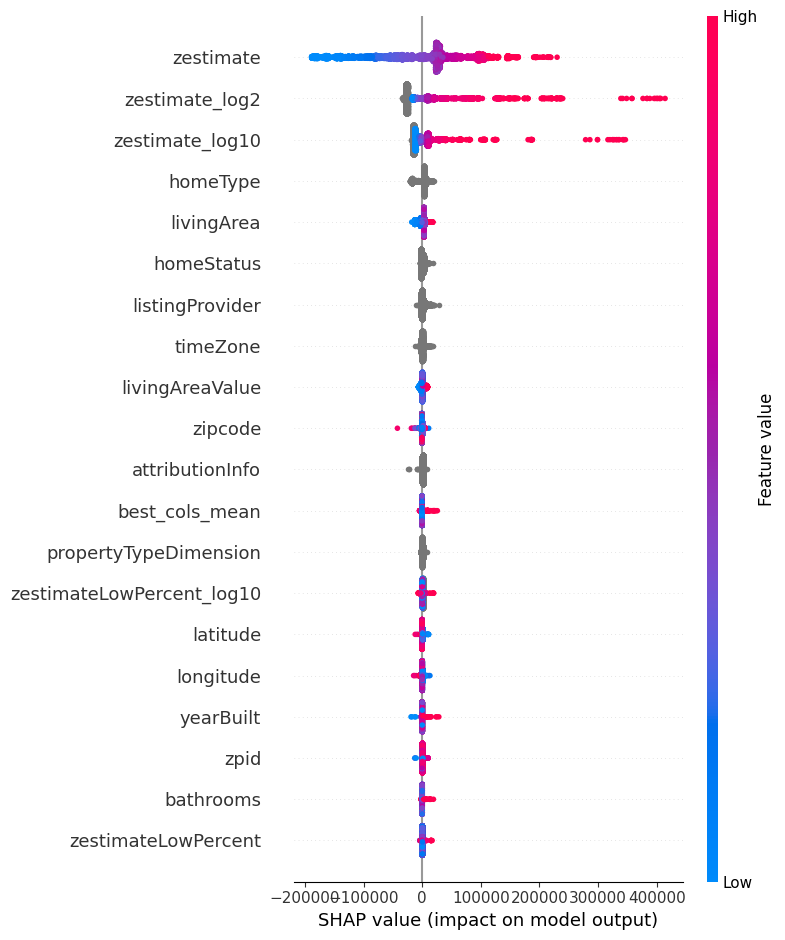

In [51]:
shap_values = model.get_shap()
shap.summary_plot(shap_values)

In [30]:
summary_df = pd.DataFrame({
    'feature': shap_values.feature_names,
    'shap_value': shap_values.values.mean(axis=0)
})

In [31]:
summary_df = summary_df.sort_values(by='shap_value', ignore_index=True)
del_cols = summary_df.loc[:5, 'feature'].values
summary_df.head(5)

,feature,shap_value
0,annualHomeownersInsurance,-0.013198
1,mortgageRates,-0.001623
2,bedrooms,-0.000395
3,rentZestimate,-0.000188
4,state,-0.000170


In [32]:
summary_df = summary_df.sort_values(by='shap_value', ignore_index=True, ascending=False)
best_cols = summary_df.loc[:3, 'feature'].values
summary_df.head(3)

,feature,shap_value
0,propertyTypeDimension,0.003750
1,zestimate,0.003222
2,attributionInfo,0.001420


In [47]:
# del bad cols
train.drop(columns=del_cols, inplace=True)

In [48]:
# create math cols
cols_for_math = [i for i in best_cols if i in numerical_columns]
for col in cols_for_math:
  train[col+'_log2'] = np.log2(train[col])
  test[col+'_log2'] = np.log2(test[col])

  train[col+'_log10'] = np.log10(train[col])
  test[col+'_log10'] = np.log10(test[col])

train['best_cols_mean'] = train[cols_for_math].transpose().mean().values
test['best_cols_mean'] = test[cols_for_math].transpose().mean().values

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log2
  result = ge